## 문제 1
### 1-1 정보의 균일도의 의미와 중요성에 대해서 서술하자

균일도는 특정 데이터셋에 대해 임의로 한 데이터를 뽑았을 때 이 것이 특정 라벨일 것이라고 확신할 수 있는 정도이다. 균일도가 높을 수록, 데이터에 대한 정보가 덜 필요하고, 균일도가 낮을 수록, 데이터에 대한 정보가 더 많이 필요하다

### 1-2. 정보의 균일도를 측정하는 대표적인 방법 두 가지를 서술하자

정보 이득과 지니계수가 있다. 정보 이득은 1에서 엔트로피 지수를 뺀 값이다. 엔트로피는 데이터셋의 혼잡도이기 때문에 균일도가 낮을 수록 그 값이 높다. 따라서 정보이득은 균일도가 높을 수록 큰 값을 갖게 된다. 지니계수는 0~1의 값을 갖고, 0에 가까울 수록 균일도가 높고 1에 가까울 수록 균일도가 낮다.

## 문제2

### 주어진 'titanic_processed.csv'를 GraphViz를 이용하여 결정트리의 규칙을 시각화 해보자
### Survived 속성만 별도로 분리해 클래스 결정값 데이터 세트로 설정

(Max_depth에 제약을 두지 않아 엄청 복잡하게 나옵니다. 관련 문제는 뒤에 있으니 놀라지 마시길!)

In [3]:
pip install GraphViz

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
titanic = pd.read_csv("./5기_9주차_복습과제/titanic_processed.csv")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(titanic.iloc[:,:-1],titanic.iloc[:,-1])
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="titanic_tree.dot", class_names = ["Die","Survived"],
               impurity=True, filled=True)

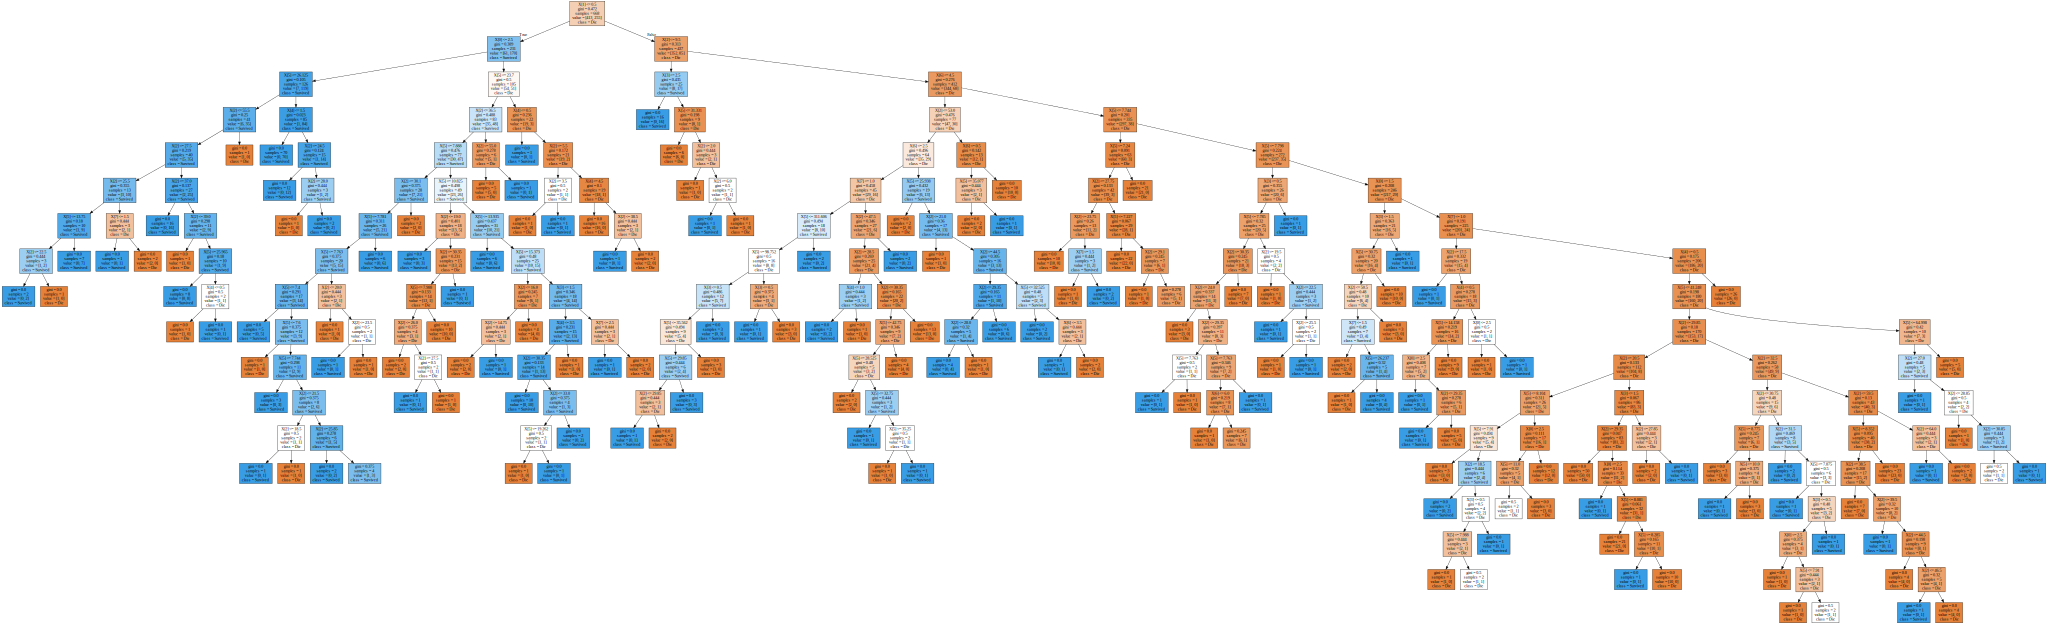

In [15]:
import graphviz

with open("titanic_tree.dot") as f:
    graph = f.read()
graphviz.Source(graph)

## 문제 3

### 주어진 'winequality-white.csv'파일을 DataFrame으로 불러온 뒤 학습용 피처 데이터 세트와 레이블 데이터 세트, 테스트용 피처 데이터 파일과 레이블 데이터 파일을 각각 학습/테스트용 DataFrame에 로드 후 로드한 학습용 피처 데이터셋을 info()함수로 살펴보자

(중복된 피처값은 존재하지 않으며, quality 속성만 별도로 분리해 클래스 결정값 데이터 세트로 설정,
처음 데이터프레임을 불러올때 교재처럼 sep='\s+'가 아니라 sep=';'로 해주세요!)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import pandas as pd

In [20]:
wine = pd.read_csv("./5기_9주차_복습과제/winequality-white.csv",sep=";")

In [24]:
X_train,X_test,y_train,y_test = train_test_split(wine.iloc[:,:-1],wine["quality"])
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3673 entries, 2835 to 3258
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3673 non-null   float64
 1   volatile acidity      3673 non-null   float64
 2   citric acid           3673 non-null   float64
 3   residual sugar        3673 non-null   float64
 4   chlorides             3673 non-null   float64
 5   free sulfur dioxide   3673 non-null   float64
 6   total sulfur dioxide  3673 non-null   float64
 7   density               3673 non-null   float64
 8   pH                    3673 non-null   float64
 9   sulphates             3673 non-null   float64
 10  alcohol               3673 non-null   float64
dtypes: float64(11)
memory usage: 344.3 KB


##  문제 4

### 4-1 문제 3에 이어서 DecisionTreeClassifier의 하이퍼 파라미터 값을 모두 추출해보자
예시답안)
결정 트리 예측 정확도: 0.xxxx

DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 16, 'splitter': 'best'}

In [35]:
from sklearn.metrics import accuracy_score

In [37]:
tree = DecisionTreeClassifier()
print(tree.fit(X_train,y_train))
predicted = tree.predict(X_test)
accuracy_score(y_test,predicted)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


0.6040816326530613

### 4-2 max_depth를 6,8,10,12,16,20,24로 늘리면서 예측 성능을 측정해보자(교차검증 5개)

예시답안)GridSearchCV 최고 평균 정확도 수치 : 0.xxxx

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': x}

In [41]:
from sklearn.model_selection import GridSearchCV
params = {"max_depth":[6,8,10,12,16,20]}
grid_tree = GridSearchCV(tree, param_grid = params, cv=5, scoring="accuracy")
grid_tree.fit(X_train,y_train)

print(grid_tree.best_score_)
print(grid_tree.best_params_)

0.5551287326919869
{'max_depth': 16}


## 문제 5 

### 문제 4에 이어서 max_depth : [6,8,10,12], min_samples_split : [16,24] 로 변경하면서 정확도 성능을 튜닝해보자

예시답안)GridSearchCV 최고 평균 정확도 수치: 0.5850

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_split': 16}


In [43]:
params = {"max_depth":[6,8,10,12], "min_samples_split":[16,24]}
grid_tree = GridSearchCV(tree, param_grid = params, scoring="accuracy", cv=5)
grid_tree.fit(X_train,y_train)
print(grid_tree.best_score_)
print(grid_tree.best_params_)

0.5281740162004857
{'max_depth': 6, 'min_samples_split': 16}
